<a href="https://colab.research.google.com/github/Lekshmi12/Ames-housing-prices/blob/master/M-gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

# Download and import the MIT 6.S191 package
!pip install mitdeeplearning
import mitdeeplearning as mdl

# Import all remaining packages
import numpy as np
import os
import time
import functools
from IPython import display as ipythondisplay
from tqdm import tqdm
!apt-get install abcmidi timidity > /dev/null 2>&1

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
#assert len(tf.config.list_physical_devices('GPU')) > 0

In [4]:
  # Download the dataset
songs = mdl.lab1.load_training_data()

# Print one of the songs to inspect it in greater detail!
example_song = songs[0]
print("\nExample song: ")
print(example_song)

Found 816 songs in text

Example song: 
X:2
T:An Buachaill Dreoite
Z: id:dc-hornpipe-2
M:C|
L:1/8
K:G Major
GF|DGGB d2GB|d2GF Gc (3AGF|DGGB d2GB|dBcA F2GF|!
DGGB d2GF|DGGF G2Ge|fgaf gbag|fdcA G2:|!
GA|B2BG c2cA|d2GF G2GA|B2BG c2cA|d2DE F2GA|!
B2BG c2cA|d^cde f2 (3def|g2gf gbag|fdcA G2:|!


In [5]:
print(songs)

['X:2\nT:An Buachaill Dreoite\nZ: id:dc-hornpipe-2\nM:C|\nL:1/8\nK:G Major\nGF|DGGB d2GB|d2GF Gc (3AGF|DGGB d2GB|dBcA F2GF|!\nDGGB d2GF|DGGF G2Ge|fgaf gbag|fdcA G2:|!\nGA|B2BG c2cA|d2GF G2GA|B2BG c2cA|d2DE F2GA|!\nB2BG c2cA|d^cde f2 (3def|g2gf gbag|fdcA G2:|!', 'X:3\nT:Belfast\nZ: id:dc-hornpipe-3\nM:C|\nL:1/8\nK:D Major\nag|(3faf df AdFA|DFAd f2ef|gbec dfAF|GABG E2ag|!\n(3faf df AdFA|DFAd f2ef|gbed cABc|d2f2 d2:|!\n(3DEF|GFGA Bcde|fgfe dcdB|A2f2 fef2|G2e2 ede2|!\nGFGA Bcde|fgfe dcdB|Afed cABc|d2f2 d2:|!\nag|(3fgf (3efe (3ded (3cdc|(3BcB (3ABA G2ba|(3gag (3fgf (3efe (3ded|(3cdc (3BcB A2ag|!\n(3fgf (3efe (3ded (3cdc|(3BcB (3ABA (3GAG (3FGF|Eged cABc|d2f2 d2:|!', 'X:4\nT:Blackbird\nZ: id:dc-hornpipe-4\nM:C|\nL:1/8\nK:D Mixolydian\nAG|F2FA GFD2|de (3fed d^cAF|G2GF GFDE|FdcA G2AG|!\nF2FA GFD2|de (3fed d^cAG|AdcA GcAG|F2D2 D2:|!\nfg|agfa gfeg|fd e^c d=cA2|agfa gfde|fdgf e2 fg|!\na2ge f3e|d^cde fdAG|AdcA GcAG|F2D2 D2:|!', "X:5\nT:Bobby Casey's\nZ: id:dc-hornpipe-5\nM:C|\nL:1/8\nK:A Dorian\ne

In [48]:
# Join our list of song strings into a single string containing all songs
songs_joined = "\n\n".join(songs) 

# Find all unique characters in the joined string
vocab = sorted(set(songs_joined))
print("There are", len(vocab), "unique characters in the dataset")

There are 83 unique characters in the dataset


In [50]:
print(songs_joined)

X:2
T:An Buachaill Dreoite
Z: id:dc-hornpipe-2
M:C|
L:1/8
K:G Major
GF|DGGB d2GB|d2GF Gc (3AGF|DGGB d2GB|dBcA F2GF|!
DGGB d2GF|DGGF G2Ge|fgaf gbag|fdcA G2:|!
GA|B2BG c2cA|d2GF G2GA|B2BG c2cA|d2DE F2GA|!
B2BG c2cA|d^cde f2 (3def|g2gf gbag|fdcA G2:|!

X:3
T:Belfast
Z: id:dc-hornpipe-3
M:C|
L:1/8
K:D Major
ag|(3faf df AdFA|DFAd f2ef|gbec dfAF|GABG E2ag|!
(3faf df AdFA|DFAd f2ef|gbed cABc|d2f2 d2:|!
(3DEF|GFGA Bcde|fgfe dcdB|A2f2 fef2|G2e2 ede2|!
GFGA Bcde|fgfe dcdB|Afed cABc|d2f2 d2:|!
ag|(3fgf (3efe (3ded (3cdc|(3BcB (3ABA G2ba|(3gag (3fgf (3efe (3ded|(3cdc (3BcB A2ag|!
(3fgf (3efe (3ded (3cdc|(3BcB (3ABA (3GAG (3FGF|Eged cABc|d2f2 d2:|!

X:4
T:Blackbird
Z: id:dc-hornpipe-4
M:C|
L:1/8
K:D Mixolydian
AG|F2FA GFD2|de (3fed d^cAF|G2GF GFDE|FdcA G2AG|!
F2FA GFD2|de (3fed d^cAG|AdcA GcAG|F2D2 D2:|!
fg|agfa gfeg|fd e^c d=cA2|agfa gfde|fdgf e2 fg|!
a2ge f3e|d^cde fdAG|AdcA GcAG|F2D2 D2:|!

X:5
T:Bobby Casey's
Z: id:dc-hornpipe-5
M:C|
L:1/8
K:A Dorian
ed|cAAB cBcd|eaaf gedB|c2Ac B2Bc|d2de dBGB|!

In [95]:
x="""z D2|G3 B dB|G3 B dB|d2 b3 a|ga fg ef|!
G3 B dB|G3 B dB|D2 F2 A2|c2 B2 A2|!
G3 B dB|G3 B dB|d2 b3 a|ga fg ef|!
dg3 Bc|d3 c AF|G2 B3 A|G3:|!
g fg|a2 f2 d2|A2 F2 D2|C2 b3 a|ga fg ef|!
d3 e d2|B3 A B2|D2 F2 A2|c2 B2 A2|!
d2 Bc dB|d b3 af|g2 b3 a|ga fg ef|!
dg3 Bc|d3 c AF|G2 B3 A|G3:|!"""

import pandas as pd
ldf=pd.DataFrame([[j for j in ngrams(i, 2)] for i in x.split(" ")]).melt()
bigram1=ldf.groupby('value').count()

In [94]:
x="""A2|f2 fe dc|d4 FG|A2 G3B,|A,2 C2 E2|!
[1 g2 f2 e2|d2 c2 B2|A2 AB AG|F2 G2:|!
[2 g2 f2 e2|d2 c2 B2|A2 ^GA Bc|d4|]!
cB|A2 f2 f2|A2 f2 f2|A2 f2 f2|a^g ba fd|!
A2 e2 e2|A2 e2 e2|A2 e2 e2|a^g ba fd|!
A2 f2 f2|A2 f2 f2|A2 f2 f2|a^g ba fd|!
A2 e2 e2|A2 e2 e2|ab ag fe|d4|]!
FA|d4 ed|c4 dc|B2 G3 B|A2 F2 F2|!
d4 ed|c4 B2|A2 G2 E2|D4:|!"""

import pandas as pd
ldf=pd.DataFrame([[j for j in ngrams(i, 2)] for i in x.split(" ")]).melt()
bigram2=ldf.groupby('value').count()

In [97]:
bigram2

variable
value            
(\n, A)         3
(\n, F)         1
(\n, [)         2
(\n, c)         1
(\n, d)         1
...           ...
(|, ])          2
(|, a)          4
(|, c)          2
(|, d)          6
(|, f)          1

[67 rows x 1 columns]

In [98]:
### Define numerical representation of text ###

# Create a mapping from character to unique index.
# For example, to get the index of the character "d", 
#   we can evaluate `char2idx["d"]`.  
char2idx = {u:i for i, u in enumerate(vocab)}

# Create a mapping from indices to characters. This is
#   the inverse of char2idx and allows us to convert back
#   from unique index to the character in our vocabulary.
idx2char = np.array(vocab)


In [99]:
print('{')
for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '"' :   3,
  '#' :   4,
  "'" :   5,
  '(' :   6,
  ')' :   7,
  ',' :   8,
  '-' :   9,
  '.' :  10,
  '/' :  11,
  '0' :  12,
  '1' :  13,
  '2' :  14,
  '3' :  15,
  '4' :  16,
  '5' :  17,
  '6' :  18,
  '7' :  19,
  ...
}


In [100]:
def vectorize_string(string):
  vectorized_output = np.array([char2idx[char] for char in string])
  return vectorized_output

# def vectorize_string(string):
  # TODO

vectorized_songs = vectorize_string(songs_joined)

In [101]:
print ('{} ---- characters mapped to int ----> {}'.format(repr(songs_joined[:10]), vectorized_songs[:10]))
# check that vectorized_songs is a numpy array
assert isinstance(vectorized_songs, np.ndarray), "returned result should be a numpy array"

'X:2\nT:An B' ---- characters mapped to int ----> [49 22 14  0 45 22 26 69  1 27]


In [102]:
### Batch definition to create training examples ###

def get_batch(vectorized_songs, seq_length, batch_size):
  # the length of the vectorized songs string
  n = vectorized_songs.shape[0] - 1
  # randomly choose the starting indices for the examples in the training batch
  idx = np.random.choice(n-seq_length, batch_size)

  '''TODO: construct a list of input sequences for the training batch'''
  input_batch = [vectorized_songs[i : i+seq_length] for i in idx]
  # input_batch = # TODO
  '''TODO: construct a list of output sequences for the training batch'''
  output_batch = [vectorized_songs[i+1 : i+seq_length+1] for i in idx]
  # output_batch = # TODO

  # x_batch, y_batch provide the true inputs and targets for network training
  x_batch = np.reshape(input_batch, [batch_size, seq_length])
  y_batch = np.reshape(output_batch, [batch_size, seq_length])
  return x_batch, y_batch


# Perform some simple tests to make sure your batch function is working properly! 
test_args = (vectorized_songs, 10, 2)
if not mdl.lab1.test_batch_func_types(get_batch, test_args) or \
   not mdl.lab1.test_batch_func_shapes(get_batch, test_args) or \
   not mdl.lab1.test_batch_func_next_step(get_batch, test_args): 
   print("======\n[FAIL] could not pass tests")
else: 
   print("======\n[PASS] passed all tests!")

[PASS] test_batch_func_types
[PASS] test_batch_func_shapes
[PASS] test_batch_func_next_step
[PASS] passed all tests!


In [103]:
x_batch, y_batch = get_batch(vectorized_songs, seq_length=5, batch_size=1)

for i, (input_idx, target_idx) in enumerate(zip(np.squeeze(x_batch), np.squeeze(y_batch))):
    print("Step {:3d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Step   0
  input: 31 ('F')
  expected output: 1 (' ')
Step   1
  input: 1 (' ')
  expected output: 32 ('G')
Step   2
  input: 32 ('G')
  expected output: 22 (':')
Step   3
  input: 22 (':')
  expected output: 82 ('|')
Step   4
  input: 82 ('|')
  expected output: 2 ('!')


In [104]:
def LSTM(rnn_units): 
  return tf.keras.layers.LSTM(
    rnn_units, 
    return_sequences=True, 
    recurrent_initializer='glorot_uniform',
    recurrent_activation='sigmoid',
    stateful=True,
  )

In [105]:
## Defining the RNN Model ###

'''TODO: Add LSTM and Dense layers to define the RNN model using the Sequential API.'''
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    # Layer 1: Embedding layer to transform indices into dense vectors 
    #   of a fixed embedding size
    tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[batch_size, None]),

    # Layer 2: LSTM with `rnn_units` number of units. 
    # TODO: Call the LSTM function defined above to add this layer.
    LSTM(rnn_units), 
    # LSTM('''TODO'''),

    # Layer 3: Dense (fully-connected) layer that transforms the LSTM output
    #   into the vocabulary size. 
    # TODO: Add the Dense layer.
    tf.keras.layers.Dense(vocab_size)
    # '''TODO: DENSE LAYER HERE'''
  ])

  return model

# Build a simple model with default hyperparameters. You will get the 
#   chance to change these later.
model = build_model(len(vocab), embedding_dim=256, rnn_units=1024, batch_size=32)

In [106]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (32, None, 256)           21248     
_________________________________________________________________
lstm (LSTM)                  (32, None, 1024)          5246976   
_________________________________________________________________
dense (Dense)                (32, None, 83)            85075     
Total params: 5,353,299
Trainable params: 5,353,299
Non-trainable params: 0
_________________________________________________________________


In [107]:
x, y = get_batch(vectorized_songs, seq_length=100, batch_size=32)
pred = model(x)
print("Input shape:      ", x.shape, " # (batch_size, sequence_length)")
print("Prediction shape: ", pred.shape, "# (batch_size, sequence_length, vocab_size)")

Input shape:       (32, 100)  # (batch_size, sequence_length)
Prediction shape:  (32, 100, 83) # (batch_size, sequence_length, vocab_size)


In [108]:
sampled_indices = tf.random.categorical(pred[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()
sampled_indices

array([57, 35, 46, 76, 55, 65,  9, 76, 18, 44, 31, 66, 29, 73, 16,  1, 45,
       32, 67, 75, 67, 75, 25, 15, 22, 37, 61, 51, 50, 37, 13, 32, 57, 37,
       55, 11, 59, 56, 31, 76, 81, 49, 55, 77,  2, 16, 28, 38, 19, 18, 10,
       59, 11, 35, 62, 48, 12, 68, 40, 43, 80, 68, 54, 69, 56, 72, 71, 59,
        1, 42, 80, 19,  8, 28, 79, 63, 22, 49, 26,  1, 64, 66, 23, 14, 38,
       47,  6, 75, 24, 43, 50,  5, 11, 61, 73,  8, 27,  6, 77, 61])

In [109]:
print("Input: \n", repr("".join(idx2char[x[0]])))
print()
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices])))

Input: 
 "c2A2 A2:|!\n\nX:53\nT:Sherlock's\nZ: id:dc-hornpipe-48\nM:C|\nL:1/8\nK:G Major\n(3DEF|GA (3GFE DG,B,D|GFGA B"

Next Char Predictions: 
 "bJUu_j-u6SFkDr4 TGltlt>3:LfZYL1GbL_/daFuzX_v!4CM76.d/JgW0mORym^naqpd Qy7,Cxh:XA ik<2MV(t=RY'/fr,B(vf"


In [ ]:
x2 = """bJUu_j-u6SFkDr4 TGltlt>3:LfZYL1GbL_/daFuzX_v!4CM76.d/JgW0mORym^naqpd Qy7,Cxh:XA ik<2MV(t=RY'/fr,B(vf"""

In [110]:
## Defining the loss function ###

'''TODO: define the loss function to compute and return the loss between
    the true labels and predictions (logits). Set the argument from_logits=True.'''
def compute_loss(labels, logits):
  loss = tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)
  # loss = tf.keras.losses.sparse_categorical_crossentropy('''TODO''', '''TODO''', from_logits=True) # TODO
  return loss

'''TODO: compute the loss using the true next characters from the example batch 
    and the predictions from the untrained model several cells above'''
example_batch_loss = compute_loss(y, pred)
# example_batch_loss = compute_loss('''TODO''', '''TODO''') # TODO

print("Prediction shape: ", pred.shape, " # (batch_size, sequence_length, vocab_size)") 
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (32, 100, 83)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.4207206


In [122]:
### Hyperparameter setting and optimization ###

# Optimization parameters:
num_training_iterations = 2000  # Increase this to train longer
batch_size = 10  # Experiment between 1 and 64
seq_length = 100  # Experiment between 50 and 500
learning_rate = 5e-3  # Experiment between 1e-5 and 1e-1

# Model parameters: 
vocab_size = len(vocab)
embedding_dim = 256 
rnn_units = 1024  # Experiment between 1 and 2048

# Checkpoint location: 
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "my_ckpt")

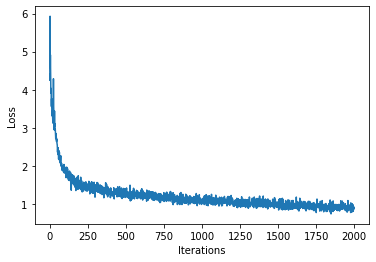

100%|██████████| 2000/2000 [2:06:54<00:00,  3.81s/it]


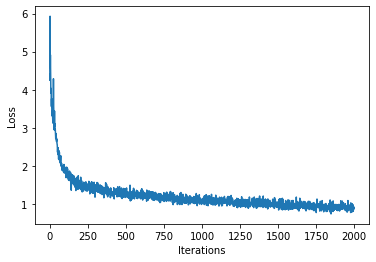

In [123]:
### Define optimizer and training operation ###

'''TODO: instantiate a new model for training using the `build_model`
  function and the hyperparameters created above.'''
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size)
# model = build_model('''TODO: arguments''')

'''TODO: instantiate an optimizer with its learning rate.
  Checkout the tensorflow website for a list of supported optimizers.
  https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/
  Try using the Adam optimizer to start.'''
optimizer = tf.keras.optimizers.Adam(learning_rate)
# optimizer = # TODO

@tf.function
def train_step(x, y): 
  # Use tf.GradientTape()
  with tf.GradientTape() as tape:
  
    '''TODO: feed the current input into the model and generate predictions'''
    y_hat = model(x) # TODO
    # y_hat = model('''TODO''')
  
    '''TODO: compute the loss!'''
    loss = compute_loss(y, y_hat) # TODO
    # loss = compute_loss('''TODO''', '''TODO''')

  # Now, compute the gradients 
  '''TODO: complete the function call for gradient computation. 
      Remember that we want the gradient of the loss with respect all 
      of the model parameters. 
      HINT: use `model.trainable_variables` to get a list of all model
      parameters.'''
  grads = tape.gradient(loss, model.trainable_variables) # TODO
  # grads = tape.gradient('''TODO''', '''TODO''')
  
  # Apply the gradients to the optimizer so it can update the model accordingly
  optimizer.apply_gradients(zip(grads, model.trainable_variables))
  return loss

##################
# Begin training!#
##################

history = []
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss')
if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for iter in tqdm(range(num_training_iterations)):

  # Grab a batch and propagate it through the network
  x_batch, y_batch = get_batch(vectorized_songs, seq_length, batch_size)
  loss = train_step(x_batch, y_batch)

  # Update the progress bar
  history.append(loss.numpy().mean())
  plotter.plot(history)

  # Update the model with the changed weights!
  if iter % 100 == 0:     
    model.save_weights(checkpoint_prefix)
    
# Save the trained model and the weights
model.save_weights(checkpoint_prefix)


In [124]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1) # TODO
# model = build_model('''TODO''', '''TODO''', '''TODO''', batch_size=1)

# Restore the model weights for the last checkpoint after training
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (1, None, 256)            21248     
_________________________________________________________________
lstm_5 (LSTM)                (1, None, 1024)           5246976   
_________________________________________________________________
dense_5 (Dense)              (1, None, 83)             85075     
Total params: 5,353,299
Trainable params: 5,353,299
Non-trainable params: 0
_________________________________________________________________


In [136]:
### Prediction of a generated song ###

def generate_text(model, start_string, generation_length=1000):
  # Evaluation step (generating ABC text using the learned RNN model)

  '''TODO: convert the start string to numbers (vectorize)'''
  input_eval = [char2idx[s] for s in start_string] # TODO
  # input_eval = ['''TODO''']
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Here batch size == 1
  model.reset_states()
  tqdm._instances.clear()

  for i in tqdm(range(generation_length)):
      '''TODO: evaluate the inputs and generate the next character predictions'''
      predictions = model(input_eval)
      # predictions = model('''TODO''')
      
      # Remove the batch dimension
      predictions = tf.squeeze(predictions, 0)
      
      '''TODO: use a multinomial distribution to sample'''
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
      # predicted_id = tf.random.categorical('''TODO''', num_samples=1)[-1,0].numpy()
      
      # Pass the prediction along with the previous hidden state
      #   as the next inputs to the model
      input_eval = tf.expand_dims([predicted_id], 0)
      
      '''TODO: add the predicted character to the generated text!'''
      # Hint: consider what format the prediction is in vs. the output
      text_generated.append(idx2char[predicted_id]) # TODO 
      # text_generated.append('''TODO''')
    
  return (start_string + ''.join(text_generated))

In [137]:
#Use the model and the function defined above to generate ABC format text of length 1000!
 #   As you may notice, ABC files start with "X" - this may be a good start string.'''
generated_text = generate_text(model, start_string="X", generation_length=1000) # TODO
# generated_text = generate_text('''TODO''', start_string="X", generation_length=1000)

100%|██████████| 1000/1000 [00:09<00:00, 101.07it/s]


In [132]:
## Play back generated songs ###

generated_songs = mdl.lab1.extract_song_snippet(generated_text)

for i, song in enumerate(generated_songs): 
  # Synthesize the waveform from a song
  waveform = mdl.lab1.play_song(song)

  # If its a valid song (correct syntax), lets play it! 
  if waveform:
    print("Generated song", i)
    ipythondisplay.display(waveform)

Found 1 songs in text
Generated song 0


In [133]:
print(generated_text)

X:322
M:6/8
L:1/8
K:E Dorian
fg|afdf afdf|afgf edBA|Bdef gfed|eggf agfe|dBAF E2:M:9/8
L:1/8
K:D Major
AG|FDAD BDAD|D2ADF D2FA|BFAF EFDF|E2eg fdd:|!

X:5
T:O'Donneef agaf|gedB BABd|!
g3f g2fg|a2fa b2af|g2fg ecAF|G2eg fd=cA|!
G2DE GABcdge|dBcA BABc|d^cde fdcd|!
dggf gbag|fddc d3e|fded edef|gfed cAdB|!
A3B BAFA|D2FA DFFd|Bcdf AFEF|D2F2 AF:|!
fg|afdf efde|fee2 dfaf|g2bg fafg|afef egfe|!
dcBA B3A|defe dedB|A2FA DAFA|Bdef edBA|BdcA Bc:A d2cd|BdB B2A|BAB def|!
g3 f3|gfe efg|afd Bcd|efg faf|!
d2fd gfed|BABG F2A2|Bdef g2Bd|efge BdAF|!
GBB2 Bcde|faeg faaf|e2ce e2de|faeb afeg|a2gb a2efg|afd e2d|!
eaa eea|aef a2f|gfg dcB|!
[1 g2B B2A|Bee eff|aff fee|Bdf egf|!
a2e edB|def ede|fe dBAF|GFE2 BAFA|BcBA FAF:|!
M:C|
L:1/8
K:D Major
D2FEFG=FEF|G2FG AGEG|BAGF G2eg
Z: id:dc-hornpipe-23
M:C|
L:1/8
K:E Minor
DEF2 AFEg|f2ed efge|fded cAAB|d2fd Add:|!

X:67
T:Lett Me
Z: id:dc-reel-264
dBAG|FGdc BGBd|ecAG FDE^C|!
Dibilebe
Z: id:dc-reel-50
M:C
L:1/8
K:D Major
AF|DFF2 AFFE|F2cF FEFG|A2GF GABcf|e2cd edce|d2d2 cA|]!

In [134]:
y1 = """g3f g2fg|a2fa b2af|g2fg ecAF|G2eg fd=cA|!
G2DE GABcdge|dBcA BABc|d^cde fdcd|!
dggf gbag|fddc d3e|fded edef|gfed cAdB|!
A3B BAFA|D2FA DFFd|Bcdf AFEF|D2F2 AF:|!
fg|afdf efde|fee2 dfaf|g2bg fafg|afef egfe|!
dcBA B3A|defe dedB|A2FA DAFA|Bdef edBA|BdcA Bc:A d2cd|BdB B2A|BAB def|!
g3 f3|gfe efg|afd Bcd|efg faf|!
d2fd gfed|BABG F2A2|Bdef g2Bd|efge BdAF|!
GBB2 Bcde|faeg faaf|e2ce e2de|faeb afeg|a2gb a2efg|afd e2d|!
eaa eea|aef a2f|gfg dcB|!
[1 g2B B2A|Bee eff|aff fee|Bdf egf|!
a2e edB|def ede|fe dBAF|GFE2 BAFA|BcBA FAF:|!"""

rdf=pd.DataFrame([[j for j in ngrams(i, 2)] for i in y1.split(" ")]).melt()
bigramy1=rdf.groupby('value').count()

In [135]:
bigramy1

variable
value            
(\n, A)         1
(\n, G)         2
(\n, [)         1
(\n, a)         1
(\n, d)         3
...           ...
(|, a)          8
(|, d)          4
(|, e)          3
(|, f)          6
(|, g)          5

[123 rows x 1 columns]